# Supervision 3: Statistical Thermodynamics

## Problem set

### 1

Weight: 84
After gap doubling: 20


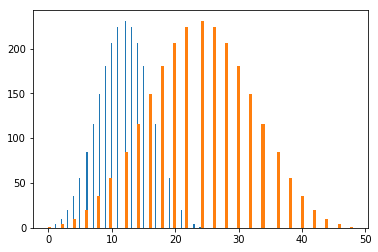

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

energy_level = list(range(7))
combs = product(energy_level, repeat=4)
sums = [sum(x) for x in combs]
count = sum(list(x == 6 for x in sums))
print("Weight: {}".format(count))
plt.hist(sums, bins=100)

# double the energy gap
energy_level_double = [x*2 for x in energy_level]
combs = product(energy_level_double, repeat=4)
sums = [sum(x) for x in combs]
count = sum(list(x == 6 for x in sums))
print("After gap doubling: {}".format(count))

plt.hist(sums, bins=100)
plt.show()

### 2
Easy proof and
$$\Delta S = C_V \left( \frac {\delta T}{T} \right) ^2 \ (\delta T \text{ is small})$$
remember that we have
$$\frac {P_\text{init}}{P_\text{final}} = exp \left( \frac{-\Delta S}{k} \right)$$

In [2]:
import math

k = 1.38e-23 # Boltzman constant
T = 300
delta_T =  0.1
C_V = 25

delta_S = C_V * (delta_T / T) ** 2
print("delta_S: {}".format(delta_S))

P = math.exp(-delta_S / k)
print("P: {} (exp({}))".format(P, -delta_S / k))

# if P2 = 0.001
P2 = 0.001
delta_S2 = - math.log(P2) * k
print("delta_S2: {}".format(delta_S2))
delta_T2 = math.sqrt(delta_S2 / C_V) * T
print("delta_T2: {}".format(delta_T2))

delta_S: 2.7777777777777783e-06
P: 0.0 (exp(-2.0128824476650566e+17))
delta_S2: 9.53270228499535e-23
delta_T2: 5.858133510426616e-10


### 3

E_m: 0, Weight: 28
E_m: 1, Weight: 21
E_m: 2, Weight: 15
E_m: 3, Weight: 10
E_m: 4, Weight: 6
E_m: 5, Weight: 3
E_m: 6, Weight: 1


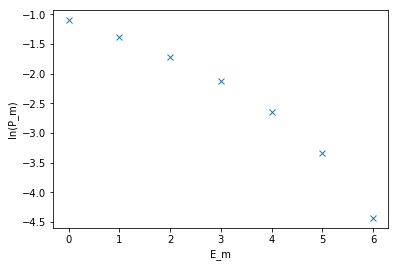

In [3]:
import numpy as np

energy_level = list(range(7))
combs = product(energy_level, repeat=3)
sums = [sum(x) for x in combs]
# Weights when E_m = 0, 1, 2, ...,6
weights = []
for E_m in range(7):
    count = sum(list(x == 6 - E_m for x in sums))
    print("E_m: {}, Weight: {}".format(E_m, count))
    weights.append(count)
P_m = np.array(weights) / sum(np.array(weights))

# print(P_m)
# plt.plot(list(range(7)), P_m, 'x')
plt.ylabel('ln(P_m)')
plt.xlabel('E_m')
plt.plot(np.array(list(range(7))), np.log(P_m), 'x')

### 4
#### (a)
$$q = \sum_i exp\left( \frac{-\epsilon_i}{kT} \right)$$

### 7 
#### (a)
$$E_n = \frac {n^2 h^2}{8 m a^2}$$
$$q_\text{trans, 1D} = \left( \frac{2\pi m k T}{h^2}\right) ^ {1/2} a = \frac{a}{\Lambda}$$
#### (c)
$$q_\text{trans, 3D} = \left( \frac{2\pi m k T}{h^2}\right) ^ {3/2} V = V/\Lambda^3$$

In [4]:
# (b)
h = 6.626e-34 # Planck constant m^2kg/s
m = 28.01e-3 / 6.02e23
T = 298
thermal_wavelength = math.sqrt(h**2/(2*math.pi*m*k*T))
print("thermal_wavelength: {}m".format(thermal_wavelength))

# (c)
R = 8.3145
p = 1e5 # N/m^2
V_m = R * T / p
print("Molar volume: {}m^3/mol".format(V_m))
q_3d = V_m / math.pow(thermal_wavelength, 3) # 1 mole
print("q_3d: {}".format(q_3d))

thermal_wavelength: 1.9109772345704417e-11m
Molar volume: 0.02477721m^3/mol
q_3d: 3.550470116879316e+30


### 8
#### (a)
Rotational partition function for diatomic molecule
Given that for rigid motor:
$$E_J = BJ(J+1)$$
rotational constant
$$B = \frac{\hbar ^2}{2I}$$
moment of inertia
$$I = \mu R^2 = \frac{m1m2}{m1+m2} R^2 $$

assuming integral can be used
$$q_\text{rot} = \int_0^\infty(2J+1)exp\left( \frac{-BJ(J+1)}{kT} \right)dJ = \frac{kT}{B}$$

rotational temperature is defined as
$$\theta_\text{rot} = \frac{B}{k}$$
and
$$q_\text{rot} = \frac{T}{\sigma \theta_\text{rot}}$$

Notice $\sigma$, the symmetry number

In [5]:
# (b)
# N2 molecule
B = 1.999 # cm^-1
k = 0.6950 # cm^-1K^-1
T = 298

theta_rot = B / k # K
print("theta_rot: {} K".format(theta_rot))

q_rot = T / (2 * theta_rot)
print("q_rot: {}".format(q_rot))

theta_rot: 2.876258992805756 K
q_rot: 51.803401700850415


### 9
$$q'_{vib} \ vs. \ q_\text{vib}$$
Key point:  
$$\frac{1}{2}h\nu$$